In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
Dataset1=pd.read_csv('/content/drive/MyDrive/news.zip')

In [ ]:
Dataset1.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [ ]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

<ipython-input-9-586347da7020>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
<ipython-input-9-586347da7020>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [ ]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [ ]:
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

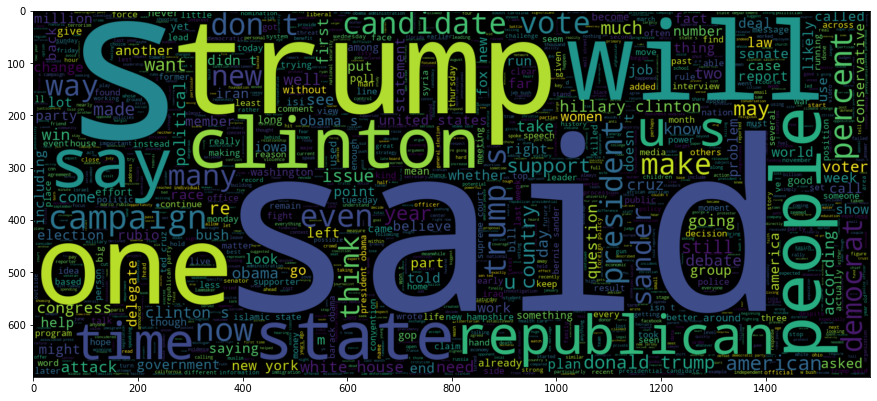

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

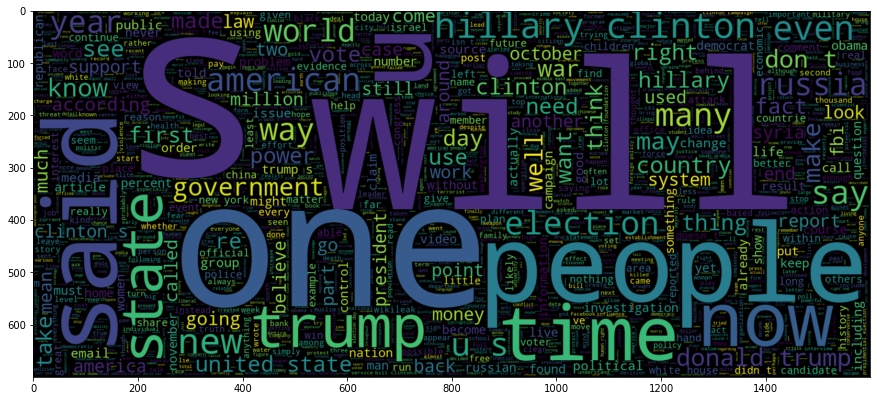

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
real = pd.read_csv('/content/drive/MyDrive/True.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
for key,count in real.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
print(f"Total Records:\t{real.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [ ]:
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


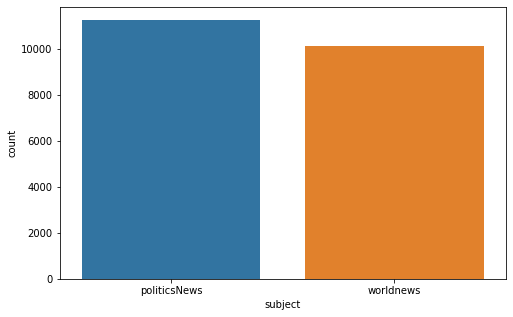

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=real)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


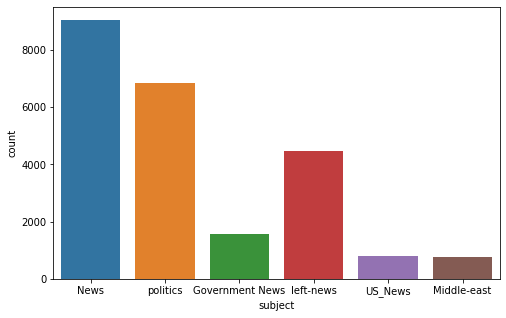

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

In [ ]:
real['label']= 1
fake['label']= 0
Dataset2 = pd.concat([real, fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [ ]:
Dataset2

,Article,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [ ]:
Dataset2['Article']=Dataset2['Article'].apply(wordpre)


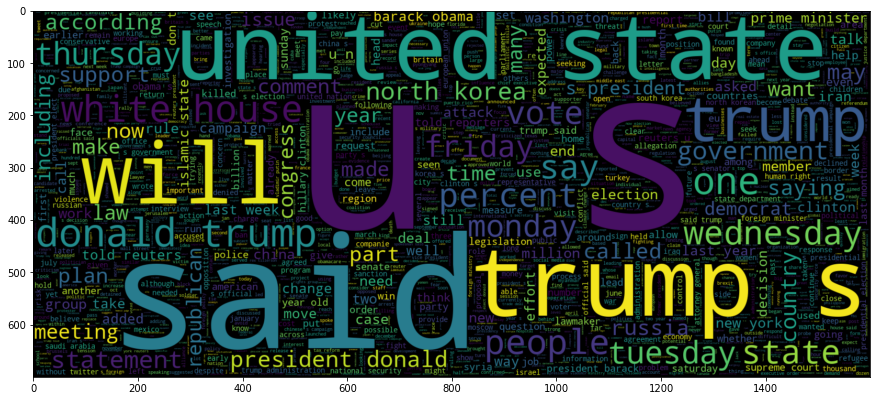

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

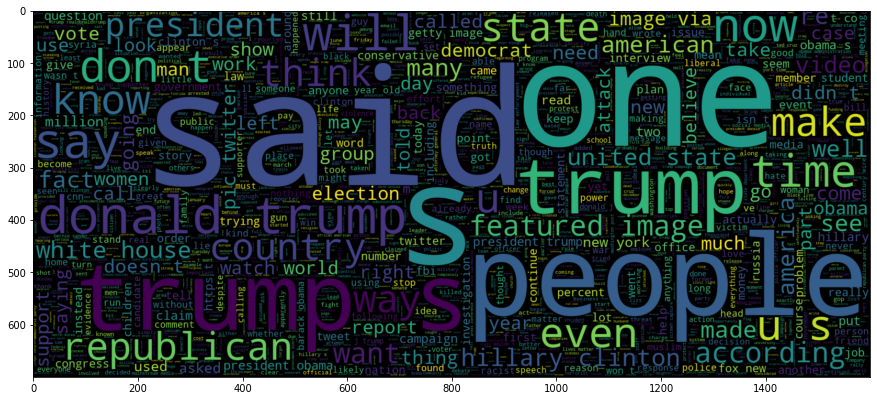

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [ ]:
#combining all the datset into one
frames = [Dataset1, Dataset2]
Dataset = pd.concat(frames)

In [ ]:
Dataset.shape

(51233, 2)

In [ ]:
x_train,y_train,x_test,y_test=train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [ ]:
x_train.shape

(40986,)

In [ ]:
x_test.shape

(40986,)

In [ ]:
y_train.shape

(40986,)

In [ ]:
y_test.shape

(10247,)

In [ ]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 96.65%


In [ ]:
#####DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.29%


In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.81%


In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', PassiveAggressiveClassifier())])

PassiveAggressiveClassifiermodel = pipe.fit(x_train, y_train) 
prediction = PassiveAggressiveClassifiermodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
PassiveAggressiveClassifiermodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 97.86%


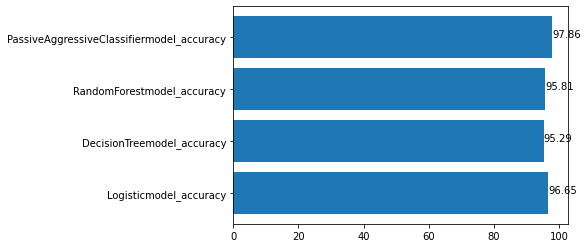

In [ ]:
x = ["Logisticmodel_accuracy","DecisionTreemodel_accuracy","RandomForestmodel_accuracy","PassiveAggressiveClassifiermodel_accuracy"]
y =  [Logisticmodel_accuracy,DecisionTreemodel_accuracy,RandomForestmodel_accuracy,PassiveAggressiveClassifiermodel_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))